In [ ]:
"""
Purpose: To Inspect the Neurons that were really bad

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-25 00:45:20,671 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 00:45:20,673 - settings - Setting database.user to celiib
INFO - 2021-04-25 00:45:20,674 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 00:45:20,689 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-25 00:45:20,690 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 00:45:20,702 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-25 00:45:21,157 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 00:45:21,161 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 00:45:21,162 - settings - Setting database.user to celiib
INFO - 2021-04-25 00:45:21,163 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 00:45:21,164 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 00:45:21,165 - settings - Setting database.user to celiib
INFO - 2021-04-25 00:45:21,165 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 00:45:21,168 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 00:45:21,607 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-25 00:45:21,729 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 00:45:21,731 - settings - Setting database.user to celiib
INFO - 2021-04-25 00:45:21,732 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 00:45:21,736 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 00:45:22,223 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Downloading the Neuron

In [5]:
seg_id = 864691136311791677
seg_id = 864691135348272855
seg_id = 864691135771629819
seg_id = 864691136175008774
seg_id = 864691136105493209

In [6]:
#1) Dwonload the neuron object
neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                   border_validation=True)

Decompressing Neuron in minimal output mode...please wait



--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}




Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 1:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {'offset': 1500, 'comparison_distance': 2000, 'worst_case_match_threshold': 65, 'width_diff_max': 60, 'match_threshold': 45, 'angle_buffer': 15, 'max_degree_to_resolve': 6, 'match_method': 'best_match'}




 ----- Working on coordinate [ 857274.3  735210.6 1094806. ]--------
coordinate [ 857274.3  735210.6 1094806. ] had error branches [12 13]--------


 ----- Working on coordinate [ 877379.9  722813.8 1023782. ]--------
coordinate [ 877379.9  722813.8 1023782. ] had error branches [19 20]--------


 ----- Working on coordinate [1071735.12377996 1055951.07117419 1053248.49149601]--------
coordinate [1071735.12377996 1055951.07117419 1053248.49149601] had error branches [42 35]--------


 ----- Working on coordinate [1092707.99779616  868740.26117456  971322.63568793]--------
coordinate [1092707.99779616  868740.26117456  971322.63568793] had error branch


--- Working on filter 2:
function = axon_webbing_t_merges
function __name__ = filter_away_webbing_t_merges
function arguments = {'child_width_maximum': 75, 'parent_width_maximum': 75, 'axon_only': True, 'error_if_web_is_none': True, 'web_size_threshold': 120, 'web_size_type': 'ray_trace_median', 'web_above_threshold': True}


limb_branch_dict_to_cancel = {'L0': [49, 51]}


Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 3:
function = double_back_and_width_change
function __name__ = filter_away_large_double_back_or_width_changes
function arguments = {'perform_double_back_errors': True, 'skip_double_back_errors_for_axon': False, 'width_jump_threshold': 250, 'running_width_jump_method': True, 'double_back_axon_like_threshold': 145, 'double_back_threshold': 120, 'allow_axon_double_back_angle_with_top': 39, 'allow_axon_double_back_angle_with_top_width_min': 140, 'skeletal_length_to_skip': 4000, 'comparison_distance': 3000, 'perform_width_errors': True, 'perform_axon_width_errors': False}


limb_branch_dict_to_cancel = {}

--- Working on filter 4:
function = axon_fork_divergence
function __name__ = filter_away_small_axon_fork_divergence
function arguments = {'divergence_threshold_mean': 165}


limb_branch_dict_to_cancel = {'L0': array([7, 8])}


Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh





 ---- Total time for applying filter: 93.29255795478821 -----

--- Finished Part 1: Filtering Neuron -----
Apply the presyn non_error
For presyn: # valid synapses = 19, # error synapses  = 158, # error presyns = 8
For postsyn: # valid synapses = 2798, # error synapses  = 3, # error presyns = 0

--- Finished Part 2: Filtering Synapses -----
Synapsse Results:
Total Number of Synapses = 2978
n_valid_syn_ids_presyn = 19
n_errored_syn_ids_presyn = 158
n_valid_syn_ids_postsyn = 2798
n_errored_syn_ids_postsyn = 3

--- Finished Part 3: Generating Validation Dataframe -----
Segment Id = 864691136105493209
Postsyn counts:
TP:2796
TN:2
FP:2
FN:1
Presyn counts:
TP:17
TN:49
FP:2
FN:101


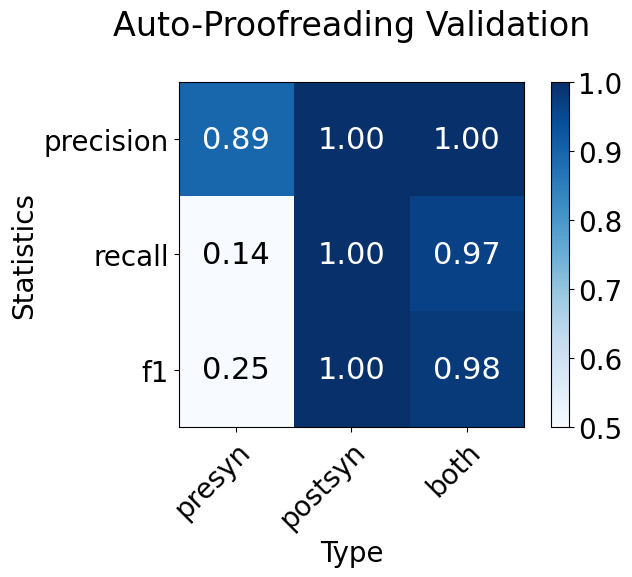

In [7]:
(filt_neuron,
 return_synapse_df_revised,
return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                    filter_list = pru.v4_exc_filters(),
                    plot_limb_branch_filter_with_disconnect_effect = True,
                    verbose = True,
                    plot_score=False)

vu.synapse_validation_df_to_score_plot(return_validation_df_revised)

In [8]:
vu.plot_validation_synapses(seg_id,
                            validation_df = return_validation_df_revised,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

Using the mesh from the neuron object


TP:yellow
TN:aqua
FP:black
FN:orange


In [24]:
import networkx_utils as nx



All sibling edges = [(14, 15), (2, 4), (4, 2), (23, 25), (25, 23)]


[[14], [2, 4], [25, 23]]

In [25]:
xu.group_nodes_into_siblings(G = neuron_obj[0].concept_network_directional,
    nodes = [],
    verbose = True)

All sibling edges = []


[]

In [39]:
import numpy as np


verbose = True
fork_div_limb_branch = {'L0': np.array([14,15,  2,  4, 23, 25])}
width_match_threshold = 10
width_match_buffer = 10

ed.attempt_width_matching_for_fork_divergence(neuron_obj,
                                              fork_div_limb_branch,
                                              width_match_threshold = 10,
                                              width_match_buffer = 10,
                                              verbose = True)

For L0 sib_groups= [[14, 15], [2, 4], [25, 23]]
For sibling group [14, 15]: upstream node = 16
Widths are [61.4905306  80.04047336], upstream_width = 61.53837721468874
width_differences= [ 0.04784661 18.50209614]
With min_idx= 0, 14 was a matching node to the upstream node
For sibling group [2, 4]: upstream node = 5
Widths are [ 58.67784076 169.70334389], upstream_width = 60.018024483855164
width_differences= [  1.34018373 109.6853194 ]
With min_idx= 0, 2 was a matching node to the upstream node
For sibling group [25, 23]: upstream node = 26
Widths are [51.38841105 77.9009854 ], upstream_width = 70.4597140721286
width_differences= [19.07130303  7.44127133]
With min_idx= 1, 23 was a matching node to the upstream node


{'L0': [15, 4, 25]}

In [40]:
import error_detection as ed
ed.axon_fork_divergence_errors_limb_branch_dict(neuron_obj,
                                               plot_two_downstream_thick_axon_limb_branch=True,
                                               plot_fork_div_limb_branch=True)


 Working on visualization type: mesh



 Working on visualization type: mesh


{'L0': [25]}

In [11]:
import networkx_utils as xu
xu.upstream_node(neuron_obj[0].concept_network_directional,23)

26

In [13]:
import axon_utils as au

au.axon_width(neuron_obj[0][26]), au.axon_width(neuron_obj[0][23]), au.axon_width(neuron_obj[0][25])

(70.4597140721286, 77.90098540302137, 51.388411045020064)

# Observations: The webbing not working

In [ ]:
import error_detection as ed
ed.webbing_t_errors_limb_branch_dict(neuron_obj,
                                     axon_only = True,
                                #child_width_maximum = 75,
                                parent_width_maximum = 75,
                                plot_two_downstream_thin_axon_limb_branch = True,
                                plot_wide_angled_children = False,
                                error_if_web_is_none = True,
                                verbose = True,

                                #arguments for the web thresholding
                                web_size_threshold=120,
                                web_size_type="ray_trace_median",
                                web_above_threshold = True,

                                plot_web_errors = True,
                                    child_skeletal_threshold = 10000)

In [ ]:
import trimesh_utils as tu
tu.mesh_size(neuron_obj[1][17].web,size_type="ray_trace_median")

In [ ]:
nru.classify_upstream_downsream(limb_obj,nru.find_branch_with_specific_coordinate(limb_obj,crossover_coordinates[0]))

In [ ]:
import networkx_utils as xu
xu.upstream_node(limb_obj.concept_network_directional,14)

In [ ]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict=dict(L1 = [17]),
                     mesh_whole_neuron=True)

In [ ]:
nviz.plot_web_intersection(neuron_obj,
                           1,
                          17)

# Inspecting why crossover did so poorly

In [ ]:
limb_obj = neuron_obj[neuron_obj.axon_limb_name]

In [ ]:
exactly_equal = False
crossover_coordinates = nru.high_degree_branching_coordinates_on_limb(limb_obj,min_degree_to_find=4,
                                                                         exactly_equal=exactly_equal,
                                                                         )
crossover_coordinates

In [ ]:
nviz.set_zoom(crossover_coordinates[0],
             radius = 20000)

In [ ]:
winning_downstream,error_downstream = ed.high_degree_upstream_match(limb_obj,
                          coordinate = crossover_coordinates[1],
                        plot_intermediates = True,
                        plot_match_intermediates = True,
                          verbose=True)
print(winning_downstream,error_downstream)

In [ ]:
from importlib import reload
ed = reload(ed)

In [ ]:
import error_detection as ed
err_dict = ed.high_degree_branch_errors_limb_branch_dict(neuron_obj,
                                                        verbose = True,
                                                        match_method="best_match")

In [ ]:
neuron_obj["L1"][186]

In [ ]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict=err_dict,
                     mesh_whole_neuron=True
                     )

In [ ]:
nviz.visualize_neuron_specific_limb(neuron_obj,1)

In [ ]:
import networkx_utils as xu
xu.downstream_nodes(neuron_obj[1].concept_network_directional,328)

In [ ]:
import numpy_utils as nu
ed.high_degree_upstream_match(
    limb_obj,
    coordinate = None,
    upstream_branch = 328,
    downstream_branches = np.array([330, 331, 333]),

    #arguments for the angle checking
    offset=1500,
    comparison_distance = 2000,
    worst_case_match_threshold = 65,
    plot_intermediates = True,
    plot_match_intermediates = True,

    #args for width matching
    width_diff_max = np.inf,#100,

    #args for definite pairs
    match_threshold = 45,
    angle_buffer = 15,
    
    max_degree_to_resolve = 6,
    axon_dependent = True,

    #args for picking the final winner
    match_method = "lowest_angle_sum", #other option is "best_match"
    verbose = True
    )

In [ ]:
import axon_utils as au
au.axon_width(neuron_obj[1][333])

In [ ]:
array([330, 331, 333])